# Learning Basic Tensorflow Operations

In [100]:
# This project aims to demonstrate and understand how a basic deep learning model could be built using Tensorflow

In [101]:
# importing the required libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [103]:
# set the seed values to generate random values in a predictable fashion.

In [104]:
np.random.seed(101)
tf.set_random_seed(101)

In [105]:
# The following datapoints are fictious and are generated to test the NN's basic working by feeding them in as datapoints.

In [106]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [107]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [108]:
# The following place holders support for the Logistic Regression operations

In [109]:
a = tf.placeholder(tf.float32)

In [110]:
b = tf.placeholder(tf.float32)

In [111]:
# define operations that needs to be done later

In [112]:
add_op = tf.add(a,b)

In [113]:
mul_op = tf.multiply(a,b)

In [114]:
with tf.Session() as sess:
    print(sess.run(mul_op,feed_dict={a:rand_a,b:rand_b}))
    
    print("\n")
    
    print(sess.run(add_op,feed_dict={a:rand_a,b:rand_b}))

[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


# Basic Neural Net with Fictious Data Defined Before

In [115]:
# Define number of features and dense layers

In [116]:
n_features = 10
n_dense_neurons = 3

In [117]:
# define the input x for the neural network.
# If there are m training examples, i.e m datapoints(rows) in the dataset
# then the dimension of the placeholder is (m,n_features)
# since we don't know the exact count of datapoints, it's set to (None,n_features)
# placeholder because the data is still unknown and would be fed into it later.
# shape(X) -> (m,n_features)

In [118]:
X = tf.placeholder(tf.float32,(None,n_features))

In [119]:
# initalize the weights of the neuron to be random with a shape that is (n_features,n_dense_neurons)
# weights are picked randomly by tensorflow
# shape(W) -> (n_features,n_dense_neurons)

In [120]:
W = tf.Variable(tf.random_normal((n_features,n_dense_neurons)))

In [121]:
# define a matrix B for biases

In [122]:
B = tf.Variable(tf.ones(n_dense_neurons))

In [123]:
# multiply X and W that forms XW
# this is part of the output Equation WX+B

In [124]:
XW = tf.matmul(X,W)

In [125]:
# Get (WX + B) 

In [126]:
Z = tf.add(XW,B)

In [127]:
# Apply a non linear function like sigmoid that provides a value b/w 0 and 1

In [128]:
A = tf.sigmoid(Z)

In [129]:
# make the variables work by initalizing them
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(A,feed_dict={X:np.random.random([1,n_features])})
    print(layer_out)

[[ 0.96004605  0.59540486  0.44251034]]


In [130]:
# the previous steps until now were just getting introduced to syntax and ideas

# Simple Regression Example With Weght Adustment

In [131]:
# Generate X and Y datapoints for regression model

In [132]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [133]:
y_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_data

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

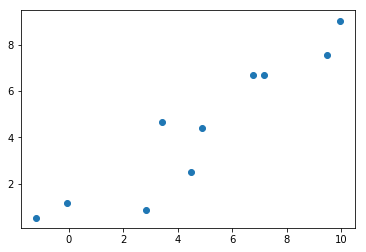

In [134]:
plt.scatter(x_data,y_data)

In [135]:
np.random.rand(2)

array([ 0.44236813,  0.87758732])

In [136]:
# initialize m and b with random values

In [137]:
w = tf.Variable(0.44)
b = tf.Variable(0.87)

In [138]:
# initialize error with 0 and proceed
error = 0

# for every datapoint in X and Y
for x,y in zip(x_data,y_data):
    
    # predict the output value from neural network
    
    # i.e weights*inputs+biases 
    y_hat = w*x + b
    
    # calculate the error and minimize it
    error += (y-y_hat)**2 
    

In [139]:
# use the Gradient Descent Optimizer from tensorflow builtin

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

In [140]:
# setup the optimizer to functioning

train = optimizer.minimize(error)

In [145]:
# define the number of training steps
training_steps = 100

# initialize the variables
init = tf.global_variables_initializer()


# initialize and run the model
with tf.Session() as sess:
    sess.run(init)
    
    # train the model defined number of times
    # i.e it fixes the weights so many number of times
    for step in range(training_steps):
        sess.run(train)
    
    final_weight, final_bias = sess.run([w,b])
    print("Weight: {}".format(final_weight))
    print("Bias: {}".format(final_bias))

Weight: 0.7445189356803894
Bias: 0.9016050100326538


In [147]:
# generate datapoints from the NN Model's weight and bias prediction
x_test = np.linspace(-1,11,10)

# Get the outputs of NN Model
y_pred_plot = final_weight*x_test+final_bias
y_pred_plot

array([ 0.15708607,  1.14977799,  2.1424699 ,  3.13516182,  4.12785373,
        5.12054565,  6.11323756,  7.10592947,  8.09862139,  9.0913133 ])

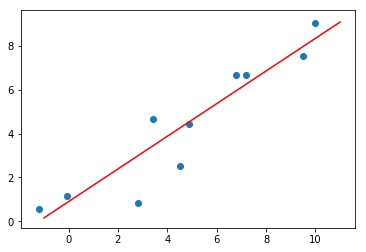

In [160]:
# Red line indicates the Neural Network
plt.plot(x_test,y_pred_plot,'r')
plt.scatter(x_data,y_data)